### Google Stock Price Prediction using RNN - LSTM

Watch Full Video Here: https://youtu.be/arydWPLDnEc

#### What is RNN
Ref- https://colah.github.io/posts/2015-08-Understanding-LSTMs/

Download Dataset- https://finance.yahoo.com/quote/GOOG/history/

Recurrent Neural Networks are the first of its kind State of the Art algorithms that can Memorize/remember previous inputs in memory, When a huge set of Sequential data is given to it. Recurrent Neural Networks are the first of its kind State of the Art algorithms that can Memorize/remember previous inputs in memory, When a huge set of Sequential data is given to it.

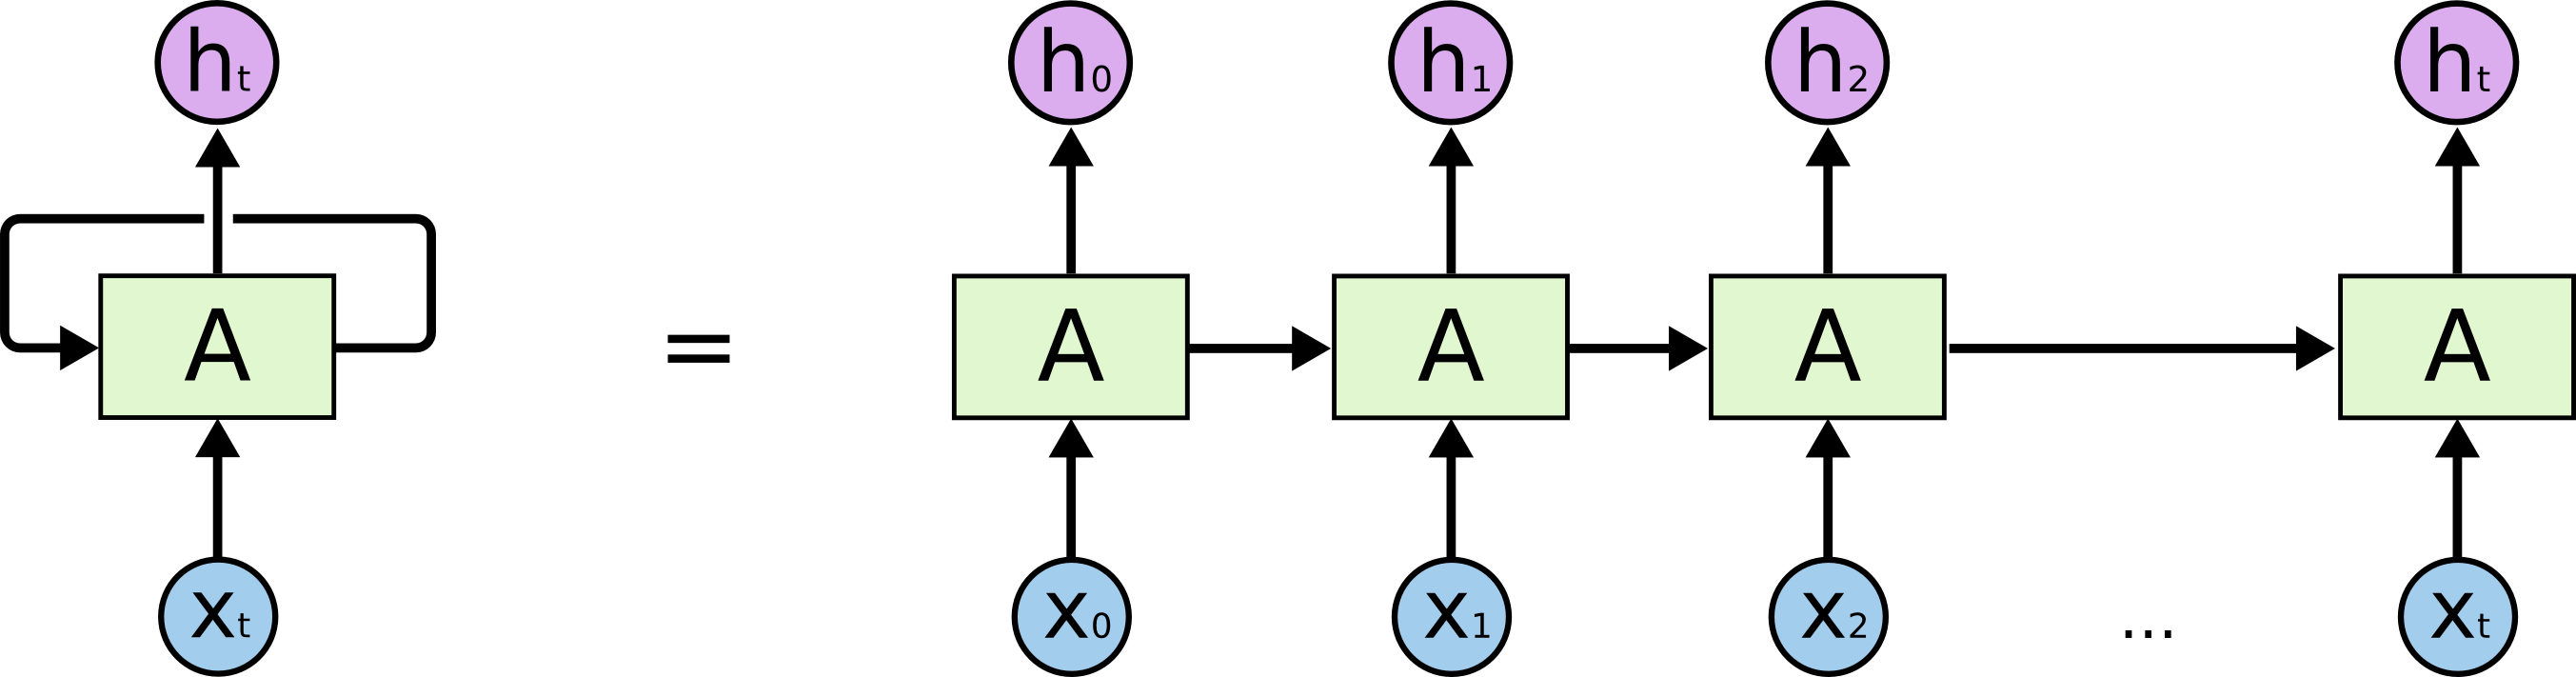

These loops make recurrent neural networks seem kind of mysterious. However, if you think a bit more, it turns out that they aren’t all that different than a normal neural network. A recurrent neural network can be thought of as multiple copies of the same network, each passing a message to a successor.

#### Different types of RNN’s 

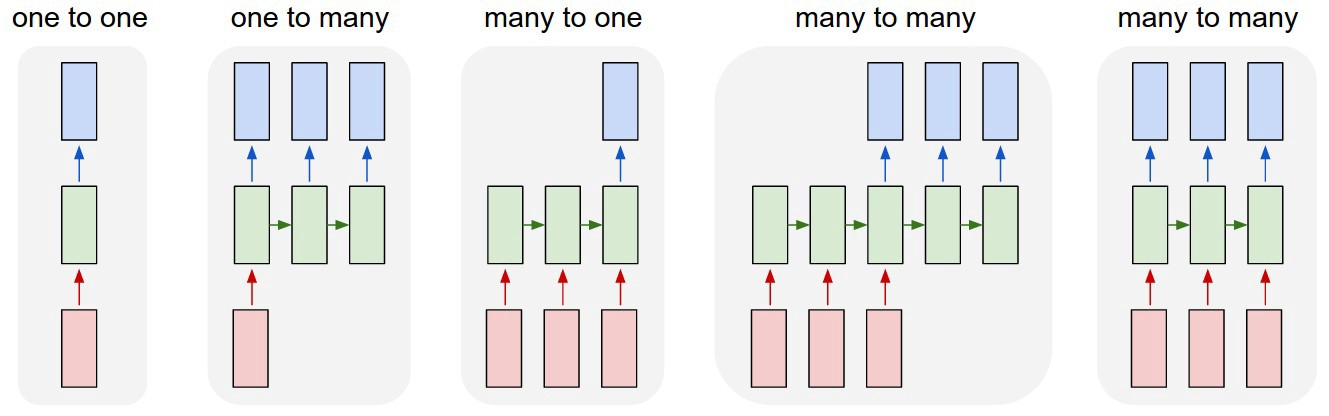

Different types of Recurrent Neural Networks. 

- Image Classification
- Sequence output (e.g. image captioning takes an image and outputs a sentence of words). 
- Sequence input (e.g. sentiment analysis where a given sentence is classified as expressing positive or negative sentiment). 
- Sequence input and sequence output (e.g. Machine Translation: an RNN reads a sentence in English and then outputs a sentence in French). 
- Synced sequence input and output (e.g. video classification where we wish to label each frame of the video)

#### The Problem of Long-Term Dependencies 

##### Vanishing Gradient

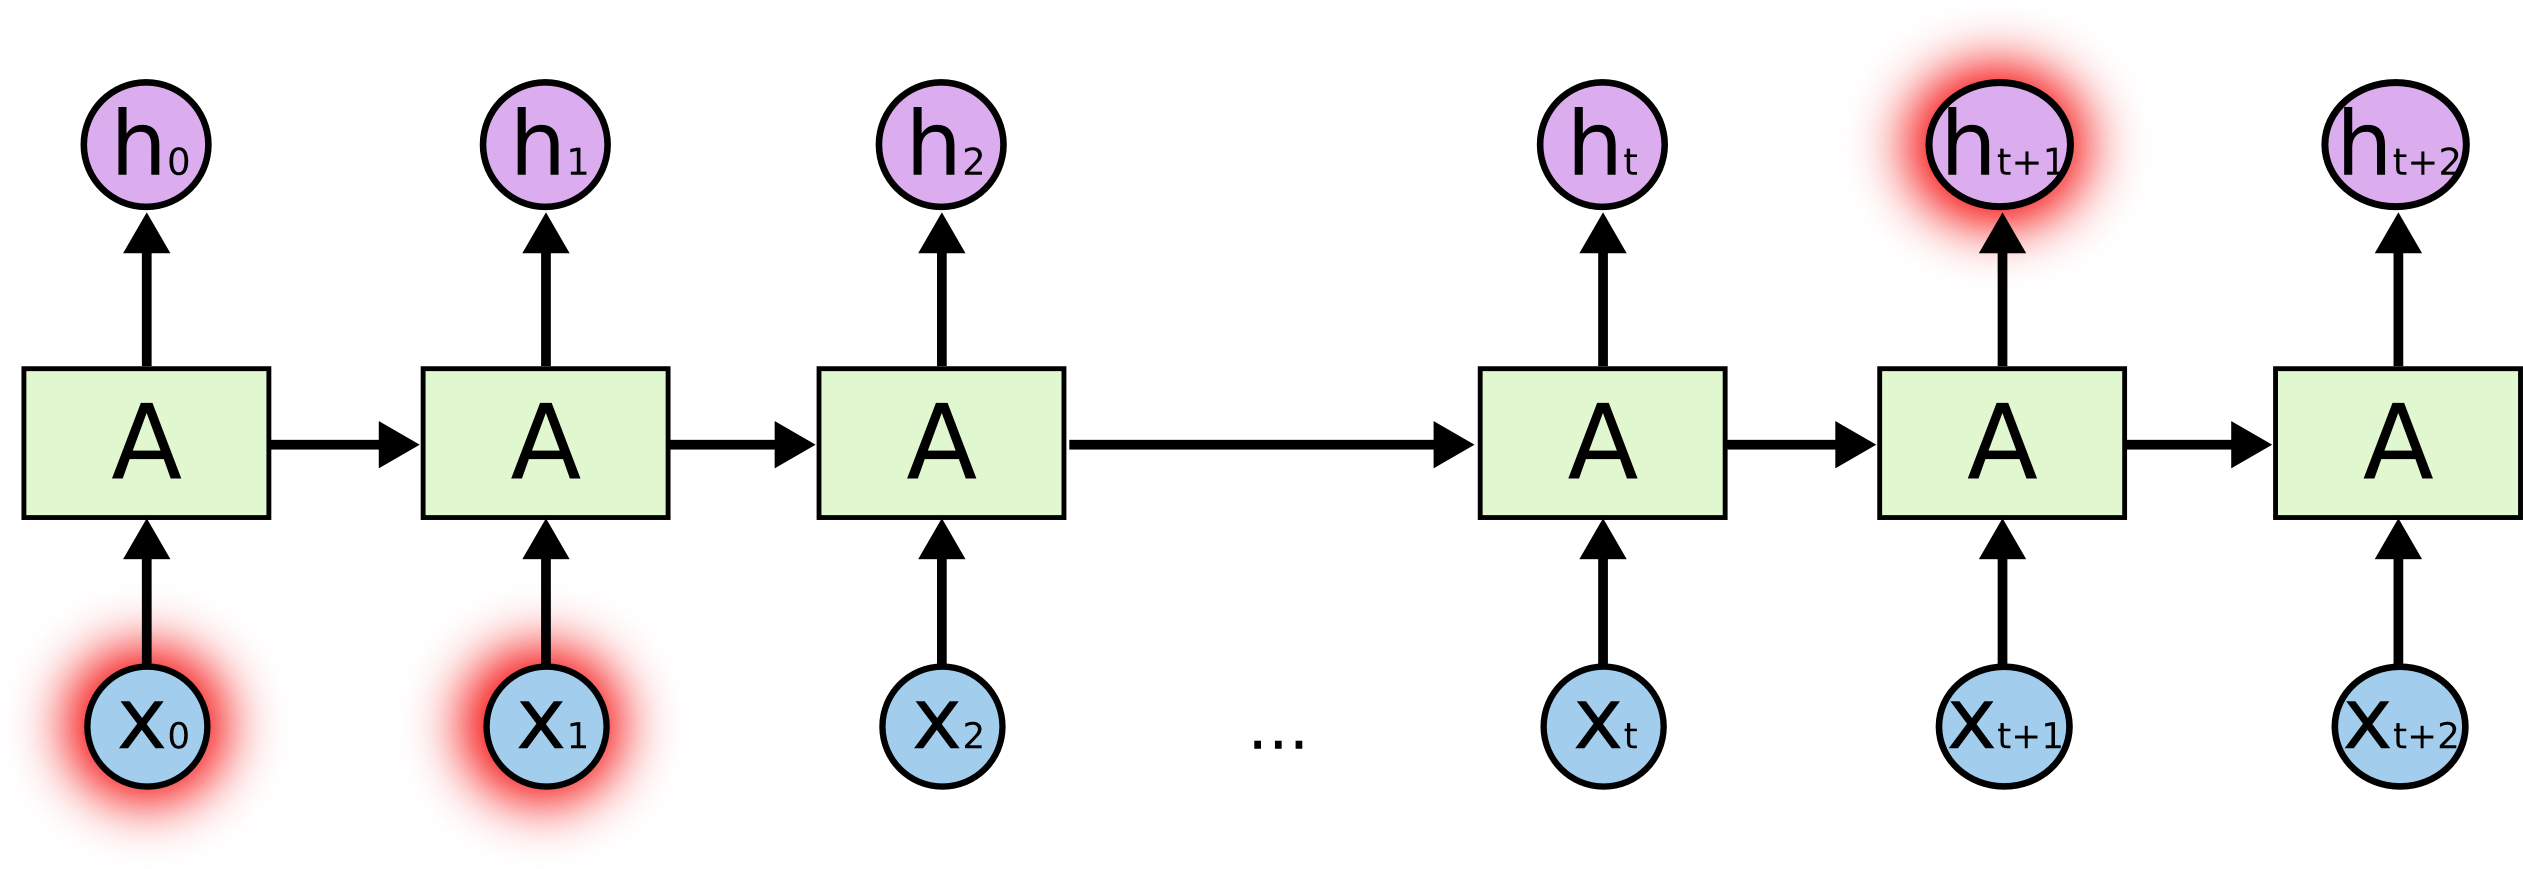

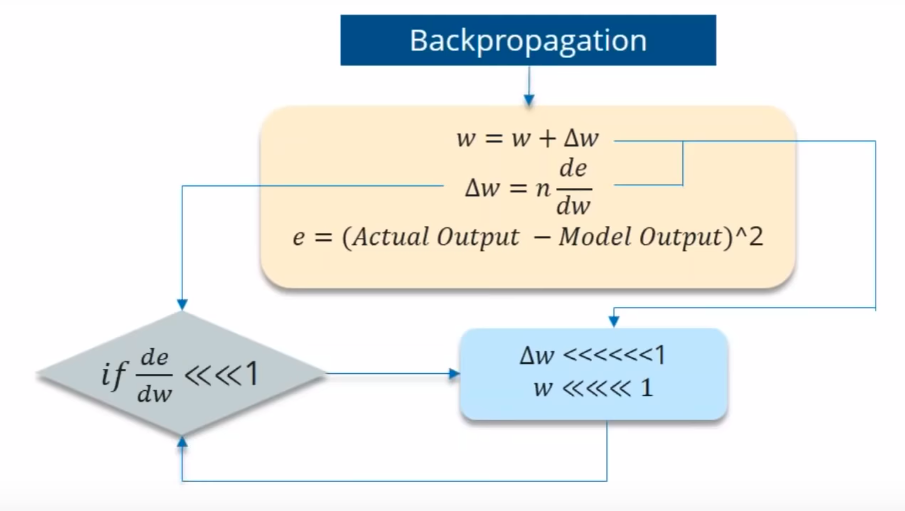

If the partial derivation of Error is less than 1, then when it get multiplied with the Learning rate which is also very less. then Multiplying learning rate with partial derivation of Error wont be a big change when compared with previous iteration.

##### Exploding Gradient

We speak of Exploding Gradients when the algorithm assigns a stupidly high importance to the weights, without much reason. But fortunately, this problem can be easily solved if you truncate or squash the gradients

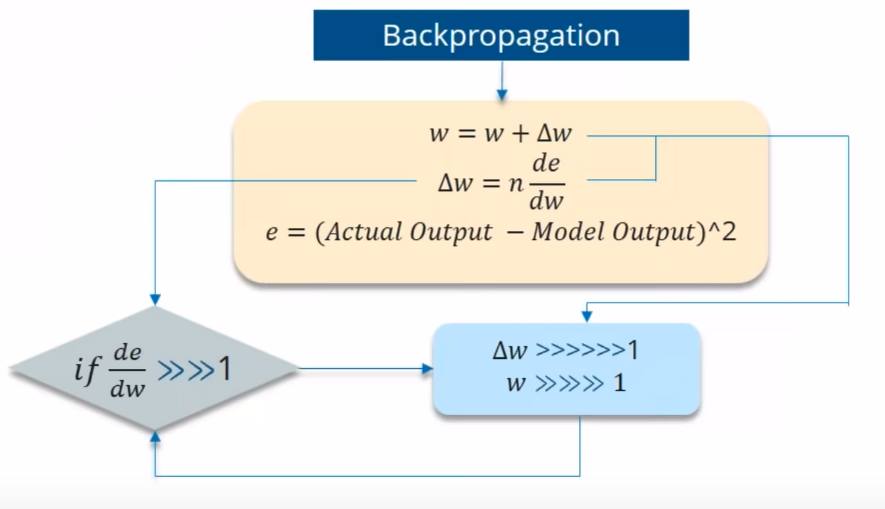

#### Long Short Term Memory (LSTM) Networks

Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies.

LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!

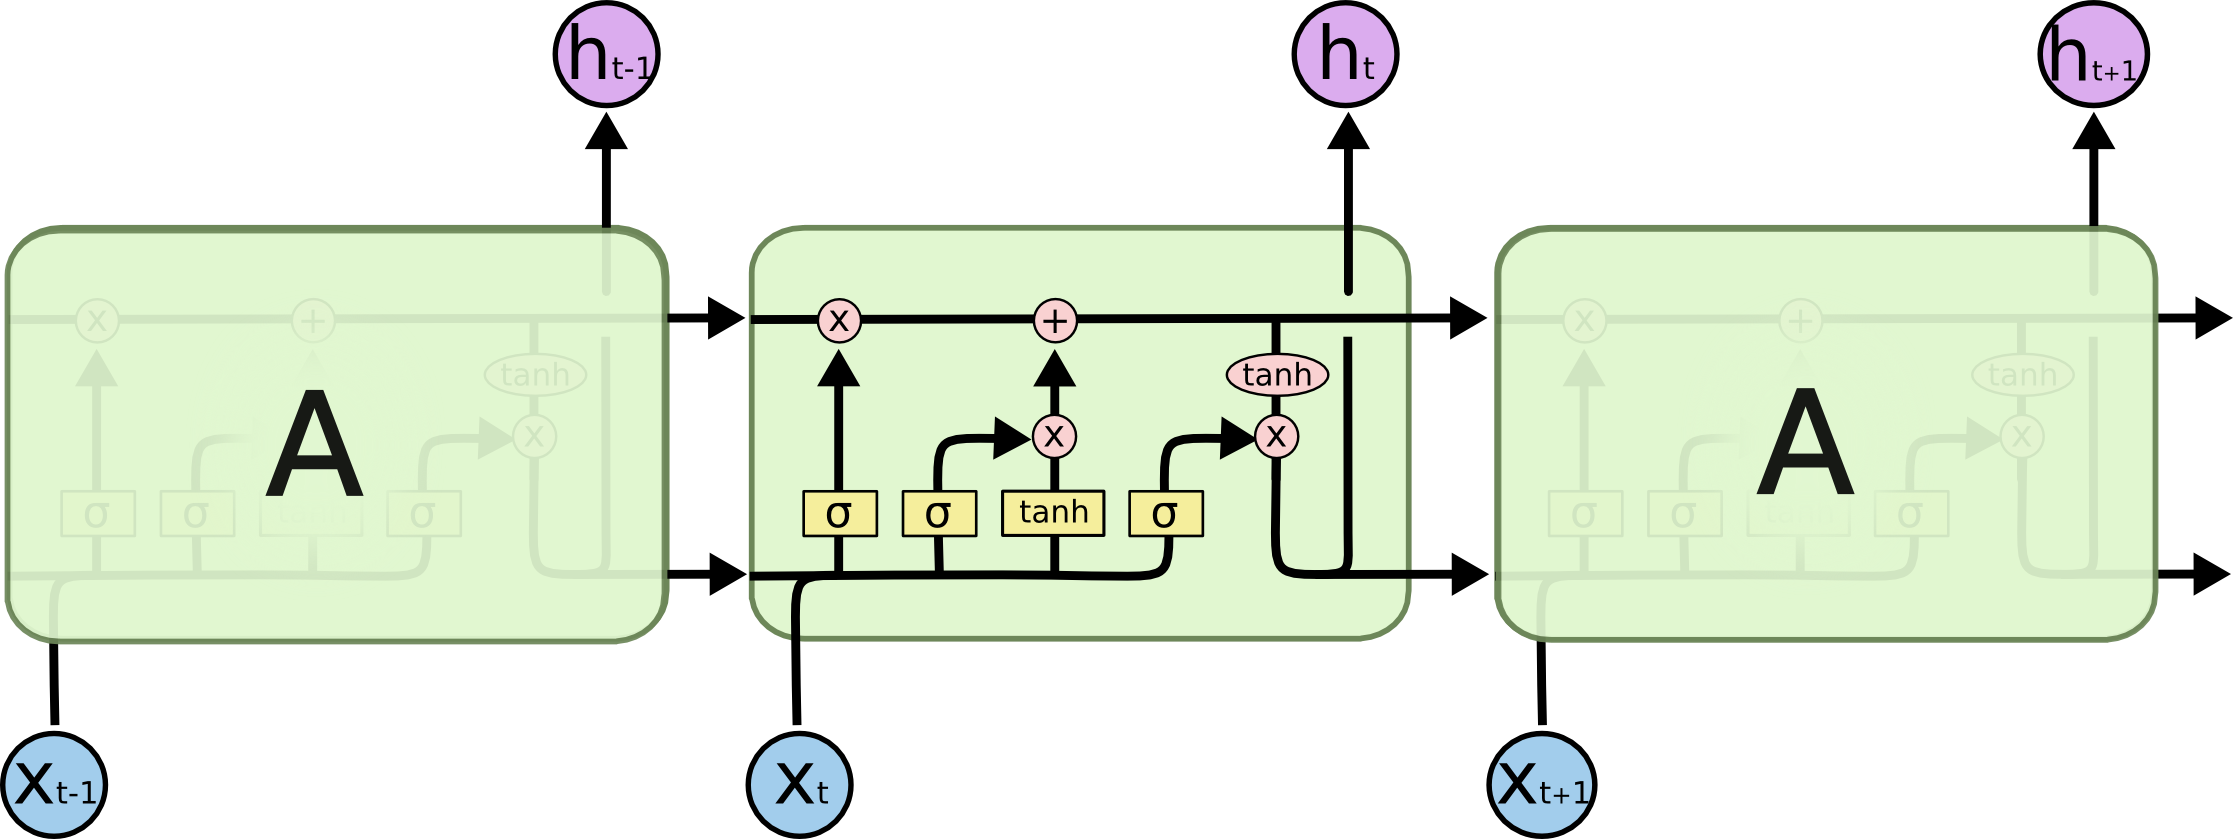

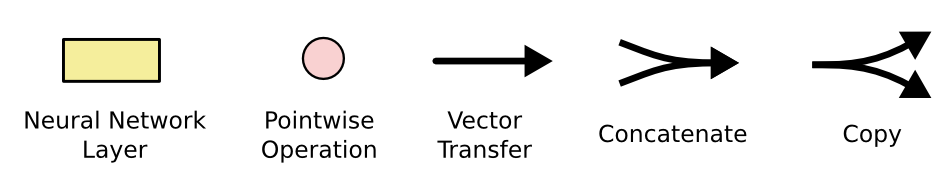

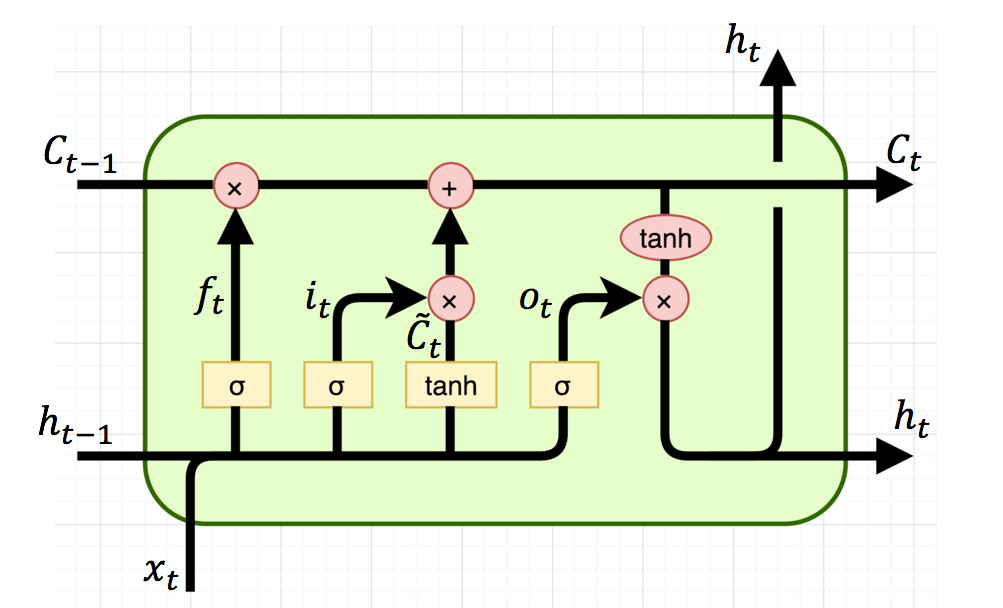

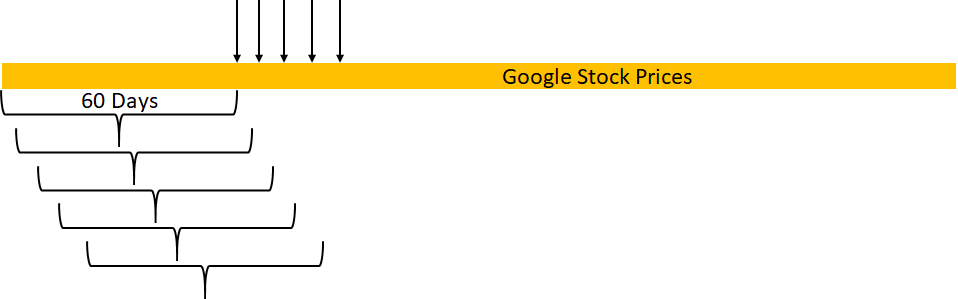

#### Steps to build stock prediction model

- Data Preprocessing
- Building the RNN
- Making the prediction and visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [58]:
data = pd.read_csv('GOOG.csv', date_parser = True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3804,2019-09-30,1220.969971,1226.000000,1212.300049,1219.000000,1219.000000,1404100
3805,2019-10-01,1219.000000,1231.229980,1203.579956,1205.099976,1205.099976,1273500
3806,2019-10-02,1196.979980,1196.979980,1171.290039,1176.630005,1176.630005,1615100
3807,2019-10-03,1180.000000,1189.060059,1162.430054,1187.829956,1187.829956,1621200
3808,2019-10-04,1191.890015,1211.439941,1189.170044,1209.000000,1209.000000,1021092


In [3]:
data_training = data[data['Date']<'2019-01-01'].copy()
data_test = data[data['Date']>='2019-01-01'].copy()

In [4]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [5]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[3.30294890e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
        5.43577404e-01],
       [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
        2.77885613e-01],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
        2.22150736e-01],
       ...,
       [7.92197108e-01, 8.11970141e-01, 7.90196475e-01, 8.15799920e-01,
        2.54672037e-02],
       [8.18777193e-01, 8.21510648e-01, 8.20249255e-01, 8.10219301e-01,
        1.70463908e-02],
       [8.19874096e-01, 8.19172449e-01, 8.12332341e-01, 8.09012935e-01,
        1.79975186e-02]])

In [6]:
# create RNN with 60 timesteps, i.e. look 60 previous time steps

In [7]:
data_training[0:10]

array([[3.30294890e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
        5.43577404e-01],
       [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
        2.77885613e-01],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
        2.22150736e-01],
       [4.91367646e-03, 4.01532941e-03, 3.15578542e-03, 1.98678849e-03,
        1.85522018e-01],
       [2.35285614e-03, 2.54928676e-03, 3.28434064e-03, 2.44873974e-03,
        1.11762967e-01],
       [2.34877785e-03, 2.52892558e-03, 3.60779701e-03, 3.22955376e-03,
        8.62763771e-02],
       [3.63326671e-03, 2.80177162e-03, 4.03492722e-03, 2.51005881e-03,
        7.55243925e-02],
       [2.48334262e-03, 1.52712947e-03, 2.50886935e-03, 8.17608079e-04,
        6.31682127e-02],
       [1.26817570e-03, 8.02253103e-04, 2.57107531e-03, 9.64778600e-04,
        5.97732318e-02],
       [1.43128522e-03, 5.00900100e-04, 1.53849690e-03, 9.81131336e-05,
        1.11151095e-01]])

In [8]:
X_train = []
y_train = []

In [9]:
for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])

In [10]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
X_train.shape

(3557, 60, 5)

### Building LSTM 

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [42]:
regressior = Sequential()

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 120, activation = 'relu'))
regressior.add(Dropout(0.2))

regressior.add(Dense(units = 1))

In [43]:
regressior.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 60, 60)            15840     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 120)              

In [44]:
regressior.compile(optimizer='adam', loss = 'mean_squared_error')

In [45]:
regressior.fit(X_train, y_train, epochs=50, batch_size=32)

Train on 3557 samples
Epoch 1/50
3557/3557 [==============================] - 16s 5ms/sample - loss: 0.0137
Epoch 2/50
3557/3557 [==============================] - 12s 3ms/sample - loss: 0.0022
Epoch 3/50
3557/3557 [==============================] - 12s 3ms/sample - loss: 0.0018
Epoch 4/50
3557/3557 [==============================] - 12s 3ms/sample - loss: 0.0016
Epoch 5/50
3557/3557 [==============================] - 12s 3ms/sample - loss: 0.0016
Epoch 6/50
3557/3557 [==============================] - 12s 3ms/sample - loss: 0.0016
Epoch 7/50
3557/3557 [==============================] - 12s 3ms/sample - loss: 0.0014
Epoch 8/50
3557/3557 [==============================] - 12s 3ms/sample - loss: 0.0016
Epoch 9/50
3557/3557 [==============================] - 12s 3ms/sample - loss: 0.0013
Epoch 10/50
3557/3557 [==============================] - 12s 3ms/sample - loss: 0.0013
Epoch 11/50
3557/3557 [==============================] - 12s 3ms/sample - loss: 0.0013
Epoch 12/50
3557/3557 [=======

### Prepare test dataset 

In [65]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900


In [66]:
data_training.tail(60)

,Date,Open,High,Low,Close,Adj Close,Volume
3557,2018-10-04,1195.329956,1197.510010,1155.576050,1168.189941,1168.189941,2209500
3558,2018-10-05,1167.500000,1173.500000,1145.119995,1157.349976,1157.349976,1184300
3559,2018-10-08,1150.109985,1168.000000,1127.364014,1148.969971,1148.969971,1932400
3560,2018-10-09,1146.150024,1154.349976,1137.572021,1138.819946,1138.819946,1308700
3561,2018-10-10,1131.079956,1132.170044,1081.130005,1081.219971,1081.219971,2675700
3562,2018-10-11,1072.939941,1106.400024,1068.270020,1079.319946,1079.319946,2949000
3563,2018-10-12,1108.000000,1115.000000,1086.401978,1110.079956,1110.079956,2101300
3564,2018-10-15,1108.910034,1113.446045,1089.000000,1092.250000,1092.250000,1372400
3565,2018-10-16,1104.589966,1124.219971,1102.500000,1121.280029,1121.280029,1928500
3566,2018-10-17,1126.459961,1128.989990,1102.189941,1115.689941,1115.689941,1467200


In [67]:
past_60_days = data_training.tail(60)

In [68]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1195.329956,1197.510010,1155.576050,1168.189941,2209500
1,1167.500000,1173.500000,1145.119995,1157.349976,1184300
2,1150.109985,1168.000000,1127.364014,1148.969971,1932400
3,1146.150024,1154.349976,1137.572021,1138.819946,1308700
4,1131.079956,1132.170044,1081.130005,1081.219971,2675700


In [69]:
inputs = scaler.transform(df)
inputs

array([[0.93805611, 0.93755773, 0.92220906, 0.91781776, 0.0266752 ],
       [0.91527437, 0.91792904, 0.91350452, 0.90892169, 0.01425359],
       [0.90103881, 0.91343268, 0.89872289, 0.90204445, 0.02331778],
       ...,
       [0.93940683, 0.93712442, 0.93529076, 0.9247443 , 0.01947328],
       [0.92550693, 0.93064972, 0.92791493, 0.9339358 , 0.01954719],
       [0.93524016, 0.94894575, 0.95017564, 0.95130949, 0.01227612]])

In [70]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

In [71]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((192, 60, 5), (192,))

In [72]:
y_pred = regressior.predict(X_test)

In [73]:
scaler.scale_

array([8.18605127e-04, 8.17521128e-04, 8.32487534e-04, 8.20673293e-04,
       1.21162775e-08])

In [74]:
scale = 1/8.18605127e-04
scale

1221.5901990069017

In [75]:
y_pred = y_pred*scale
y_test = y_test*scale

### Visualization 

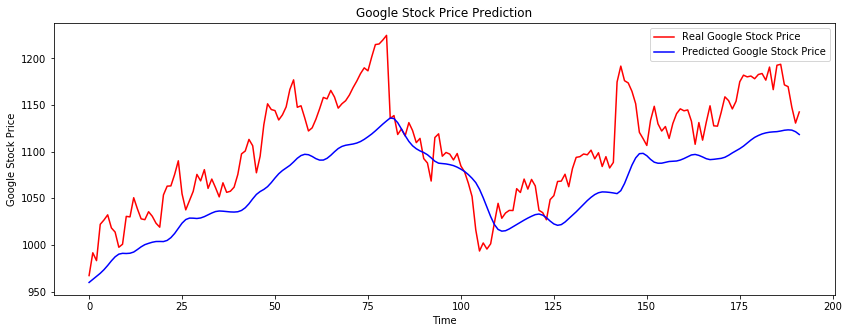

In [76]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()